In [1]:

# 1. Imports and Downloads
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sentence_transformers import SentenceTransformer, util
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

from google.colab import files
uploaded = files.upload()  # Select the file from your computer

# 2. Load Dataset
resume_df = pd.read_csv("UpdatedResumeDataSet.csv")  # should have 'Resume' and 'Category'



Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [3]:

resume_df.sample(10)

,Category,Resume
433,SAP Developer,Education Details \r\nJuly 2008 to February 20...
138,Arts,Education Details \r\nAugust 2018 to January 2...
470,Automation Testing,TECHNICAL SKILLS Automation Testing â¢ Seleni...
338,Java Developer,Education Details \r\n BE IT pjlce\r\nJava D...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
595,Python Developer,TECHNICAL PROFICIENCIES Platform: Ubuntu/Fedor...
814,ETL Developer,Technical Summary â¢ Knowledge of Informatica...
220,Mechanical Engineer,Education Details \r\nMay 1999 to September 20...
707,PMO,AREA OF EXPERTISE (PROFILE) Around 10 plus yea...
561,Python Developer,Training attended: 1. Successfully completed E...


In [13]:
resume_df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


In [17]:
resume_df.shape

(962, 3)

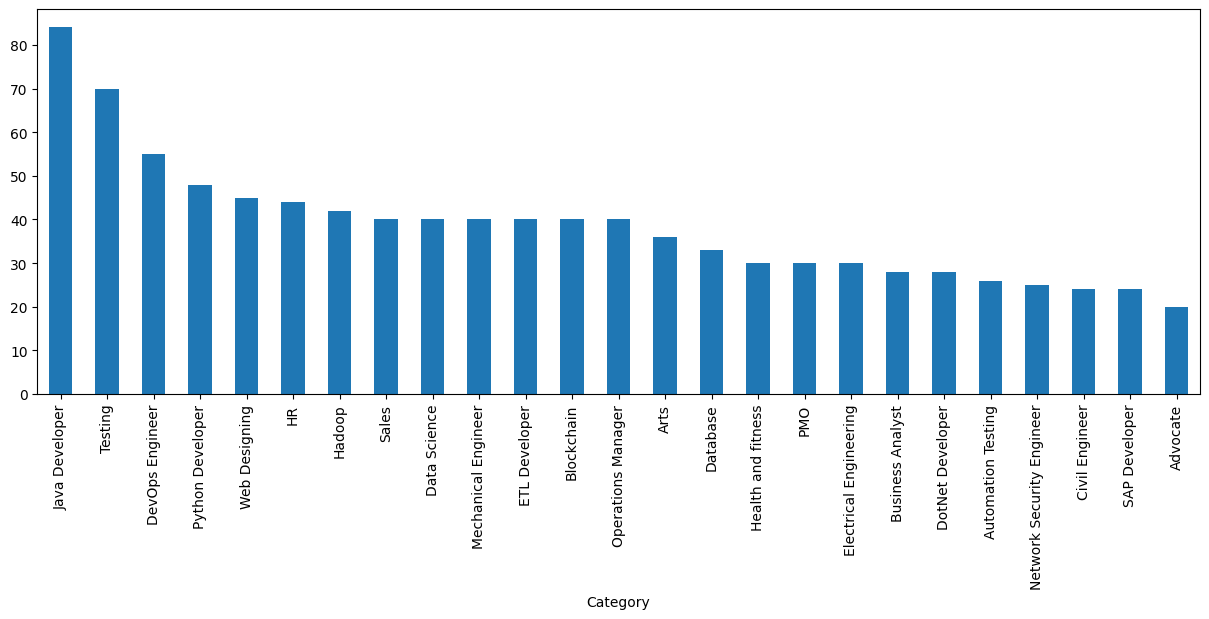

In [16]:
import matplotlib.pyplot as plt  # For plotting graphs
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
resume_df["Category"].value_counts().plot(kind="bar")


# Display the plot
plt.show()

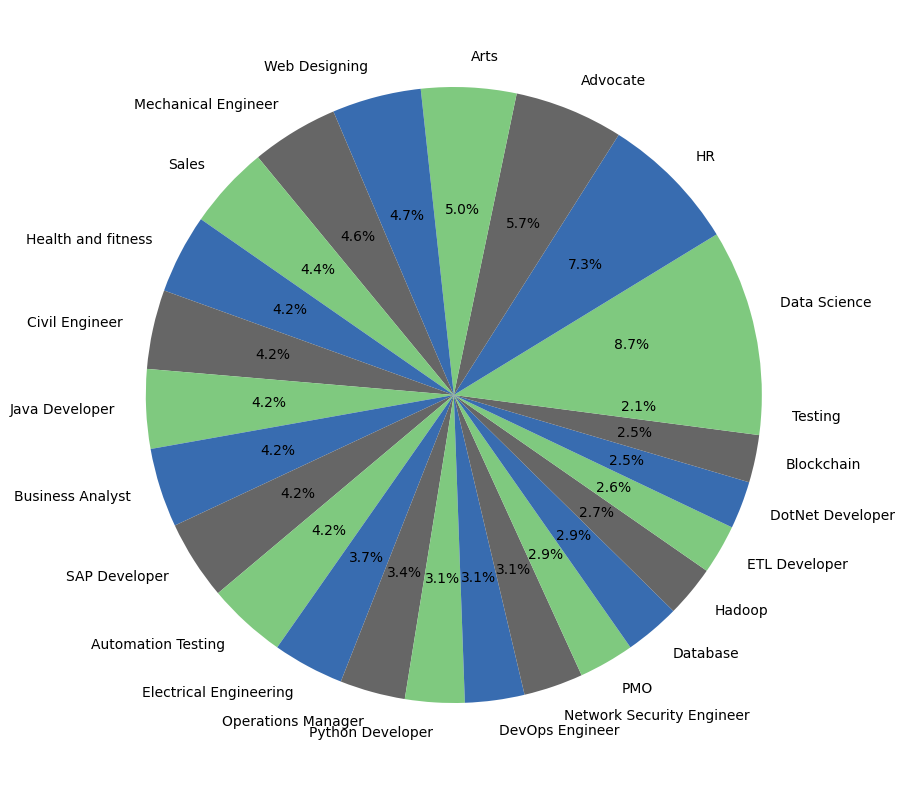

In [18]:
counts = resume_df["Category"].value_counts()
labels = resume_df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

In [5]:
# 3. Clean Text Function
def clean_text(text):
    text = re.sub(r'\r|\n|\t', ' ', text)
    text = text.encode('latin1').decode('utf-8', errors='ignore')
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text

resume_df['Cleaned_Resume'] = resume_df['Resume'].apply(clean_text)



In [6]:
# 4. Vectorize Text (for classification)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(resume_df['Cleaned_Resume'])
y = resume_df['Category']


In [7]:

# 5. Train/Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier_model = RandomForestClassifier()
classifier_model.fit(X_train, y_train)


RandomForestClassifier()

In [8]:

# 6. Evaluate
preds = classifier_model.predict(X_test)
print("\n🔍 Classification Accuracy:", accuracy_score(y_test, preds))
print("\n🧾 Classification Report:\n", classification_report(y_test, preds))



🔍 Classification Accuracy: 0.9948186528497409

🧾 Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       0.80      1.00      0.89         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.

In [9]:

# 7. Save Model and Vectorizer
joblib.dump(classifier_model, "resume_model.pkl")
joblib.dump(tfidf_vectorizer, "resume_vectorizer.pkl")


['resume_vectorizer.pkl']

In [10]:

# 8. Semantic Similarity Matcher with Skill Feedback
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Updated skill dictionary
SKILL_DICT = {
    'Java Developer': ['java', 'spring', 'hibernate', 'junit'],
    'Python Developer': ['python', 'django', 'flask', 'numpy', 'pandas'],
    'Testing': ['selenium', 'testng', 'junit', 'manual testing', 'automation'],
    'DevOps Engineer': ['jenkins', 'docker', 'kubernetes', 'ci/cd', 'ansible'],
    'Web Designing': ['html', 'css', 'javascript', 'photoshop'],
    'HR': ['recruitment', 'employee engagement', 'onboarding', 'hrms'],
    'Hadoop': ['hadoop', 'pig', 'hive', 'spark', 'mapreduce'],
    'Sales': ['negotiation', 'crm', 'lead generation', 'client management'],
    'Data Science': ['machine learning', 'pandas', 'scikit-learn', 'matplotlib', 'modeling'],
    'Mechanical Engineer': ['autocad', 'solidworks', 'thermodynamics', 'manufacturing'],
    'ETL Developer': ['informatica', 'ssrs', 'ssas', 'data warehouse'],
    'Blockchain': ['blockchain', 'ethereum', 'solidity', 'web3'],
    'Operations Manager': ['logistics', 'kpi', 'supply chain', 'inventory'],
    'Arts': ['drawing', 'painting', 'animation', 'illustration'],
    'Database': ['sql', 'oracle', 'mongodb', 'database design'],
    'Health and fitness': ['yoga', 'nutrition', 'workout', 'exercise'],
    'PMO': ['project management', 'pmo tools', 'milestones', 'ms project'],
    'Electrical Engineering': ['circuit', 'voltage', 'power', 'transformer'],
    'Business Analyst': ['requirement gathering', 'uml', 'brd', 'data analysis'],
    'DotNet Developer': ['c#', '.net', 'asp.net', 'visual studio'],
    'Automation Testing': ['selenium', 'qtp', 'loadrunner', 'automation'],
    'Network Security Engineer': ['firewall', 'vpn', 'intrusion detection', 'encryption'],
    'Civil Engineer': ['autocad', 'staad', 'construction', 'estimation'],
    'SAP Developer': ['sap', 'abap', 'fiori', 'hana'],
    'Advocate': ['litigation', 'legal research', 'drafting', 'case law']
}

def extract_skills_v2(text, category=None):
    text = text.lower()
    matched = []
    if category and category in SKILL_DICT:
        matched = [skill for skill in SKILL_DICT[category] if skill in text]
    if not matched:
        all_skills = set(sum(SKILL_DICT.values(), []))
        matched = [skill for skill in all_skills if skill in text]
    return list(set(matched))

def calculate_matching_score(job_description, resume_text, category=None):
    job_cleaned = clean_text(job_description)
    resume_cleaned = clean_text(resume_text)

    job_embed = sbert_model.encode([job_cleaned], convert_to_tensor=True)
    resume_embed = sbert_model.encode([resume_cleaned], convert_to_tensor=True)
    similarity = util.cos_sim(resume_embed, job_embed)[0][0].item() * 100

    resume_skills = extract_skills_v2(resume_cleaned, category)
    job_skills = extract_skills_v2(job_cleaned, category)
    missing_skills = list(set(job_skills) - set(resume_skills))

    return similarity, resume_skills, job_skills, missing_skills


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:

# 9. Test With Example
sample_index = 609
sample_resume = resume_df['Resume'].iloc[sample_index]
sample_resume_clean = clean_text(sample_resume)
pred_vector = tfidf_vectorizer.transform([sample_resume_clean])
predicted_category = classifier_model.predict(pred_vector)[0]
sample_job = f"We are hiring a {predicted_category} with strong background in {', '.join(SKILL_DICT.get(predicted_category, []))}."

similarity_score, user_skills, required_skills, lacking = calculate_matching_score(sample_job, sample_resume, predicted_category)

print(f"\n✅ Matching Score: {similarity_score:.2f}%")
print("✔️ Extracted Resume Skills:", user_skills)
print("📌 Required Job Skills:", required_skills)
print("❌ Skills To Learn:", lacking)
print("\n🧠 Predicted Resume Category:", predicted_category)



✅ Matching Score: 46.44%
✔️ Extracted Resume Skills: ['sql', 'automation', 'python', 'html', 'oracle']
📌 Required Job Skills: ['ansible', 'jenkins', 'kubernetes', 'docker']
❌ Skills To Learn: ['ansible', 'jenkins', 'kubernetes', 'docker']

🧠 Predicted Resume Category: DevOps Engineer


In [12]:
import joblib


import joblib

joblib.dump(classifier_model, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

model = joblib.load('model.pkl')
vectorizer = joblib.load('vectorizer.pkl')
